In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset
from torchvision import datasets, transforms, models
import timm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
import os

In [3]:
from base_trainer import Trainer
from model import SimpleCNN

In [4]:
import json

In [5]:

NUM_CLASSES = 10           # CIFAR-10


In [6]:
# Загружаем CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
class_indices = {class_idx: [] for class_idx in range(NUM_CLASSES)}
for idx, (_, label) in enumerate(train_dataset):
    class_indices[label].append(idx)


EPOCHS = 10
learning_rate = 5e-4

val_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

In [9]:


val_dict = {}
for p in [0.01, 0.1, 0.2]:

    f1 = 0.0
    for _ in range(5):

        # Разделяем данные
        initial_indices = []
        pool_indices = []

        for class_idx, indices in class_indices.items():
            np.random.shuffle(indices)  # Перемешиваем индексы внутри класса
            split_idx = int(len(indices) * p)  # Вычисляем границу разделения
            initial_indices.extend(indices[:split_idx])
        
        initial_train_dataset = Subset(train_dataset, initial_indices)
        print(f"Размер initial_train_dataset: {len(initial_train_dataset)}")
        train_dataloader = DataLoader(initial_train_dataset, batch_size=128, shuffle=True)

        model = SimpleCNN(NUM_CLASSES).to(DEVICE)
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate )
        criterion = torch.nn.CrossEntropyLoss()
        # scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
        trainer = Trainer(model = model,
                          optimizer=optimizer,
                          pool_loader=None,
                          criterion=criterion ,
                          train_loader=train_dataloader,
                          val_loader = val_dataloader,
                          device=DEVICE)
        trainer.fit(EPOCHS)
        f1 += trainer.val_f1[-1]
        del optimizer 
        del criterion
        # del scheduler
        del model
        del trainer
    f1 /= 5
    val_dict[p] = f1
    torch.cuda.empty_cache()
    print(f"f1 for random init: p = {p}, f1 = {val_dict[p]}")





Размер initial_train_dataset: 500


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.27it/s]


Validation Loss: 2.2520, Accuracy: 0.1927, F1 Score: 0.1403
Epoch 1/10 - Train Loss: 2.3020, Val Loss: 2.2520, Acc: 0.1927, F1: 0.1403


Validating: 100%|██████████| 79/79 [00:01<00:00, 43.22it/s]


Validation Loss: 2.1754, Accuracy: 0.2311, F1 Score: 0.1927
Epoch 2/10 - Train Loss: 2.1915, Val Loss: 2.1754, Acc: 0.2311, F1: 0.1927


Validating: 100%|██████████| 79/79 [00:01<00:00, 42.75it/s]


Validation Loss: 2.0805, Accuracy: 0.2837, F1 Score: 0.2761
Epoch 3/10 - Train Loss: 2.0466, Val Loss: 2.0805, Acc: 0.2837, F1: 0.2761


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.35it/s]


Validation Loss: 2.0089, Accuracy: 0.3005, F1 Score: 0.2904
Epoch 4/10 - Train Loss: 1.9174, Val Loss: 2.0089, Acc: 0.3005, F1: 0.2904


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.03it/s]


Validation Loss: 1.9821, Accuracy: 0.2862, F1 Score: 0.2797
Epoch 5/10 - Train Loss: 1.8217, Val Loss: 1.9821, Acc: 0.2862, F1: 0.2797


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.71it/s]


Validation Loss: 1.9538, Accuracy: 0.3126, F1 Score: 0.3033
Epoch 6/10 - Train Loss: 1.7094, Val Loss: 1.9538, Acc: 0.3126, F1: 0.3033


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.93it/s]


Validation Loss: 1.9352, Accuracy: 0.3280, F1 Score: 0.3210
Epoch 7/10 - Train Loss: 1.6600, Val Loss: 1.9352, Acc: 0.3280, F1: 0.3210


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.55it/s]


Validation Loss: 1.9142, Accuracy: 0.3238, F1 Score: 0.3147
Epoch 8/10 - Train Loss: 1.6133, Val Loss: 1.9142, Acc: 0.3238, F1: 0.3147


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.69it/s]


Validation Loss: 1.9061, Accuracy: 0.3410, F1 Score: 0.3315
Epoch 9/10 - Train Loss: 1.5342, Val Loss: 1.9061, Acc: 0.3410, F1: 0.3315


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.60it/s]


Validation Loss: 1.8791, Accuracy: 0.3436, F1 Score: 0.3388
Epoch 10/10 - Train Loss: 1.4639, Val Loss: 1.8791, Acc: 0.3436, F1: 0.3388
Размер initial_train_dataset: 500


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.37it/s]


Validation Loss: 2.2505, Accuracy: 0.1841, F1 Score: 0.1102
Epoch 1/10 - Train Loss: 2.3037, Val Loss: 2.2505, Acc: 0.1841, F1: 0.1102


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.55it/s]


Validation Loss: 2.1948, Accuracy: 0.2249, F1 Score: 0.1532
Epoch 2/10 - Train Loss: 2.2158, Val Loss: 2.1948, Acc: 0.2249, F1: 0.1532


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.41it/s]


Validation Loss: 2.1049, Accuracy: 0.2846, F1 Score: 0.2472
Epoch 3/10 - Train Loss: 2.1197, Val Loss: 2.1049, Acc: 0.2846, F1: 0.2472


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.58it/s]


Validation Loss: 2.0173, Accuracy: 0.2901, F1 Score: 0.2445
Epoch 4/10 - Train Loss: 2.0023, Val Loss: 2.0173, Acc: 0.2901, F1: 0.2445


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.05it/s]


Validation Loss: 1.9704, Accuracy: 0.3018, F1 Score: 0.2702
Epoch 5/10 - Train Loss: 1.8741, Val Loss: 1.9704, Acc: 0.3018, F1: 0.2702


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.31it/s]


Validation Loss: 1.9297, Accuracy: 0.3117, F1 Score: 0.2738
Epoch 6/10 - Train Loss: 1.8015, Val Loss: 1.9297, Acc: 0.3117, F1: 0.2738


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.02it/s]


Validation Loss: 1.9063, Accuracy: 0.3266, F1 Score: 0.3018
Epoch 7/10 - Train Loss: 1.7343, Val Loss: 1.9063, Acc: 0.3266, F1: 0.3018


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.44it/s]


Validation Loss: 1.8641, Accuracy: 0.3375, F1 Score: 0.3163
Epoch 8/10 - Train Loss: 1.6526, Val Loss: 1.8641, Acc: 0.3375, F1: 0.3163


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.07it/s]


Validation Loss: 1.8596, Accuracy: 0.3404, F1 Score: 0.3173
Epoch 9/10 - Train Loss: 1.6084, Val Loss: 1.8596, Acc: 0.3404, F1: 0.3173


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.48it/s]


Validation Loss: 1.8534, Accuracy: 0.3470, F1 Score: 0.3234
Epoch 10/10 - Train Loss: 1.5338, Val Loss: 1.8534, Acc: 0.3470, F1: 0.3234
Размер initial_train_dataset: 500


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.44it/s]


Validation Loss: 2.2210, Accuracy: 0.1961, F1 Score: 0.1457
Epoch 1/10 - Train Loss: 2.2839, Val Loss: 2.2210, Acc: 0.1961, F1: 0.1457


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.45it/s]


Validation Loss: 2.1373, Accuracy: 0.2518, F1 Score: 0.2062
Epoch 2/10 - Train Loss: 2.1716, Val Loss: 2.1373, Acc: 0.2518, F1: 0.2062


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.54it/s]


Validation Loss: 2.0798, Accuracy: 0.2705, F1 Score: 0.2340
Epoch 3/10 - Train Loss: 2.0530, Val Loss: 2.0798, Acc: 0.2705, F1: 0.2340


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.34it/s]


Validation Loss: 2.0403, Accuracy: 0.2758, F1 Score: 0.2499
Epoch 4/10 - Train Loss: 1.9951, Val Loss: 2.0403, Acc: 0.2758, F1: 0.2499


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.84it/s]


Validation Loss: 2.0114, Accuracy: 0.2894, F1 Score: 0.2843
Epoch 5/10 - Train Loss: 1.9149, Val Loss: 2.0114, Acc: 0.2894, F1: 0.2843


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.20it/s]


Validation Loss: 2.0001, Accuracy: 0.2991, F1 Score: 0.2831
Epoch 6/10 - Train Loss: 1.8194, Val Loss: 2.0001, Acc: 0.2991, F1: 0.2831


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.33it/s]


Validation Loss: 1.9641, Accuracy: 0.3134, F1 Score: 0.2868
Epoch 7/10 - Train Loss: 1.7600, Val Loss: 1.9641, Acc: 0.3134, F1: 0.2868


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.44it/s]


Validation Loss: 1.9690, Accuracy: 0.3028, F1 Score: 0.2968
Epoch 8/10 - Train Loss: 1.6775, Val Loss: 1.9690, Acc: 0.3028, F1: 0.2968


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.33it/s]


Validation Loss: 1.9241, Accuracy: 0.3210, F1 Score: 0.3048
Epoch 9/10 - Train Loss: 1.6135, Val Loss: 1.9241, Acc: 0.3210, F1: 0.3048


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.94it/s]


Validation Loss: 1.9212, Accuracy: 0.3304, F1 Score: 0.3269
Epoch 10/10 - Train Loss: 1.5729, Val Loss: 1.9212, Acc: 0.3304, F1: 0.3269
Размер initial_train_dataset: 500


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.94it/s]


Validation Loss: 2.2518, Accuracy: 0.2075, F1 Score: 0.1362
Epoch 1/10 - Train Loss: 2.2998, Val Loss: 2.2518, Acc: 0.2075, F1: 0.1362


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.53it/s]


Validation Loss: 2.1678, Accuracy: 0.2580, F1 Score: 0.2055
Epoch 2/10 - Train Loss: 2.1995, Val Loss: 2.1678, Acc: 0.2580, F1: 0.2055


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.70it/s]


Validation Loss: 2.0744, Accuracy: 0.2803, F1 Score: 0.2407
Epoch 3/10 - Train Loss: 2.0846, Val Loss: 2.0744, Acc: 0.2803, F1: 0.2407


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.21it/s]


Validation Loss: 2.0055, Accuracy: 0.3013, F1 Score: 0.2810
Epoch 4/10 - Train Loss: 1.9872, Val Loss: 2.0055, Acc: 0.3013, F1: 0.2810


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.59it/s]


Validation Loss: 1.9667, Accuracy: 0.3020, F1 Score: 0.2694
Epoch 5/10 - Train Loss: 1.9119, Val Loss: 1.9667, Acc: 0.3020, F1: 0.2694


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.40it/s]


Validation Loss: 1.9392, Accuracy: 0.3302, F1 Score: 0.3259
Epoch 6/10 - Train Loss: 1.8200, Val Loss: 1.9392, Acc: 0.3302, F1: 0.3259


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.81it/s]


Validation Loss: 1.9251, Accuracy: 0.3256, F1 Score: 0.3082
Epoch 7/10 - Train Loss: 1.7677, Val Loss: 1.9251, Acc: 0.3256, F1: 0.3082


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.93it/s]


Validation Loss: 1.8866, Accuracy: 0.3411, F1 Score: 0.3299
Epoch 8/10 - Train Loss: 1.6947, Val Loss: 1.8866, Acc: 0.3411, F1: 0.3299


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.68it/s]


Validation Loss: 1.8602, Accuracy: 0.3491, F1 Score: 0.3424
Epoch 9/10 - Train Loss: 1.6355, Val Loss: 1.8602, Acc: 0.3491, F1: 0.3424


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.60it/s]


Validation Loss: 1.8566, Accuracy: 0.3429, F1 Score: 0.3331
Epoch 10/10 - Train Loss: 1.5712, Val Loss: 1.8566, Acc: 0.3429, F1: 0.3331
Размер initial_train_dataset: 500


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.29it/s]


Validation Loss: 2.2548, Accuracy: 0.2070, F1 Score: 0.1430
Epoch 1/10 - Train Loss: 2.3046, Val Loss: 2.2548, Acc: 0.2070, F1: 0.1430


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.44it/s]


Validation Loss: 2.1781, Accuracy: 0.2262, F1 Score: 0.1530
Epoch 2/10 - Train Loss: 2.2001, Val Loss: 2.1781, Acc: 0.2262, F1: 0.1530


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.53it/s]


Validation Loss: 2.1035, Accuracy: 0.2430, F1 Score: 0.1876
Epoch 3/10 - Train Loss: 2.0859, Val Loss: 2.1035, Acc: 0.2430, F1: 0.1876


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.13it/s]


Validation Loss: 2.0444, Accuracy: 0.2763, F1 Score: 0.2382
Epoch 4/10 - Train Loss: 1.9912, Val Loss: 2.0444, Acc: 0.2763, F1: 0.2382


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.48it/s]


Validation Loss: 1.9917, Accuracy: 0.2960, F1 Score: 0.2662
Epoch 5/10 - Train Loss: 1.9011, Val Loss: 1.9917, Acc: 0.2960, F1: 0.2662


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.78it/s]


Validation Loss: 1.9421, Accuracy: 0.3143, F1 Score: 0.2864
Epoch 6/10 - Train Loss: 1.8301, Val Loss: 1.9421, Acc: 0.3143, F1: 0.2864


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.09it/s]


Validation Loss: 1.9247, Accuracy: 0.3133, F1 Score: 0.2922
Epoch 7/10 - Train Loss: 1.7255, Val Loss: 1.9247, Acc: 0.3133, F1: 0.2922


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.23it/s]


Validation Loss: 1.8895, Accuracy: 0.3298, F1 Score: 0.3000
Epoch 8/10 - Train Loss: 1.6818, Val Loss: 1.8895, Acc: 0.3298, F1: 0.3000


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.43it/s]


Validation Loss: 1.8631, Accuracy: 0.3435, F1 Score: 0.3345
Epoch 9/10 - Train Loss: 1.5904, Val Loss: 1.8631, Acc: 0.3435, F1: 0.3345


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.32it/s]


Validation Loss: 1.8506, Accuracy: 0.3462, F1 Score: 0.3279
Epoch 10/10 - Train Loss: 1.5350, Val Loss: 1.8506, Acc: 0.3462, F1: 0.3279
f1 for random init: p = 0.01, f1 = 0.3300178962681018
Размер initial_train_dataset: 5000


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.46it/s]


Validation Loss: 1.8780, Accuracy: 0.3196, F1 Score: 0.2843
Epoch 1/10 - Train Loss: 2.0482, Val Loss: 1.8780, Acc: 0.3196, F1: 0.2843


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.62it/s]


Validation Loss: 1.7374, Accuracy: 0.3907, F1 Score: 0.3646
Epoch 2/10 - Train Loss: 1.8178, Val Loss: 1.7374, Acc: 0.3907, F1: 0.3646


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.16it/s]


Validation Loss: 1.5897, Accuracy: 0.4396, F1 Score: 0.4288
Epoch 3/10 - Train Loss: 1.6415, Val Loss: 1.5897, Acc: 0.4396, F1: 0.4288


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.63it/s]


Validation Loss: 1.4945, Accuracy: 0.4800, F1 Score: 0.4776
Epoch 4/10 - Train Loss: 1.5374, Val Loss: 1.4945, Acc: 0.4800, F1: 0.4776


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.04it/s]


Validation Loss: 1.4446, Accuracy: 0.4834, F1 Score: 0.4829
Epoch 5/10 - Train Loss: 1.4390, Val Loss: 1.4446, Acc: 0.4834, F1: 0.4829


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.01it/s]


Validation Loss: 1.4211, Accuracy: 0.5004, F1 Score: 0.4911
Epoch 6/10 - Train Loss: 1.3800, Val Loss: 1.4211, Acc: 0.5004, F1: 0.4911


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.31it/s]


Validation Loss: 1.3758, Accuracy: 0.5120, F1 Score: 0.5111
Epoch 7/10 - Train Loss: 1.3350, Val Loss: 1.3758, Acc: 0.5120, F1: 0.5111


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.20it/s]


Validation Loss: 1.3489, Accuracy: 0.5175, F1 Score: 0.5122
Epoch 8/10 - Train Loss: 1.2899, Val Loss: 1.3489, Acc: 0.5175, F1: 0.5122


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.27it/s]


Validation Loss: 1.3809, Accuracy: 0.4964, F1 Score: 0.4975
Epoch 9/10 - Train Loss: 1.2348, Val Loss: 1.3809, Acc: 0.4964, F1: 0.4975


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.03it/s]


Validation Loss: 1.3296, Accuracy: 0.5196, F1 Score: 0.5115
Epoch 10/10 - Train Loss: 1.2182, Val Loss: 1.3296, Acc: 0.5196, F1: 0.5115
Размер initial_train_dataset: 5000


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.75it/s]


Validation Loss: 1.8678, Accuracy: 0.3508, F1 Score: 0.3299
Epoch 1/10 - Train Loss: 2.0431, Val Loss: 1.8678, Acc: 0.3508, F1: 0.3299


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.68it/s]


Validation Loss: 1.6757, Accuracy: 0.4171, F1 Score: 0.3973
Epoch 2/10 - Train Loss: 1.7751, Val Loss: 1.6757, Acc: 0.4171, F1: 0.3973


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.71it/s]


Validation Loss: 1.5840, Accuracy: 0.4451, F1 Score: 0.4335
Epoch 3/10 - Train Loss: 1.6101, Val Loss: 1.5840, Acc: 0.4451, F1: 0.4335


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.25it/s]


Validation Loss: 1.5232, Accuracy: 0.4606, F1 Score: 0.4469
Epoch 4/10 - Train Loss: 1.5111, Val Loss: 1.5232, Acc: 0.4606, F1: 0.4469


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.31it/s]


Validation Loss: 1.4593, Accuracy: 0.4812, F1 Score: 0.4658
Epoch 5/10 - Train Loss: 1.4265, Val Loss: 1.4593, Acc: 0.4812, F1: 0.4658


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.14it/s]


Validation Loss: 1.4034, Accuracy: 0.5037, F1 Score: 0.4927
Epoch 6/10 - Train Loss: 1.3538, Val Loss: 1.4034, Acc: 0.5037, F1: 0.4927


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.89it/s]


Validation Loss: 1.3791, Accuracy: 0.5079, F1 Score: 0.5017
Epoch 7/10 - Train Loss: 1.3035, Val Loss: 1.3791, Acc: 0.5079, F1: 0.5017


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.84it/s]


Validation Loss: 1.3704, Accuracy: 0.5140, F1 Score: 0.5086
Epoch 8/10 - Train Loss: 1.2498, Val Loss: 1.3704, Acc: 0.5140, F1: 0.5086


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.17it/s]


Validation Loss: 1.3492, Accuracy: 0.5208, F1 Score: 0.5184
Epoch 9/10 - Train Loss: 1.2178, Val Loss: 1.3492, Acc: 0.5208, F1: 0.5184


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.30it/s]


Validation Loss: 1.3543, Accuracy: 0.5182, F1 Score: 0.5013
Epoch 10/10 - Train Loss: 1.1655, Val Loss: 1.3543, Acc: 0.5182, F1: 0.5013
Размер initial_train_dataset: 5000


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.00it/s]


Validation Loss: 1.8388, Accuracy: 0.3622, F1 Score: 0.3435
Epoch 1/10 - Train Loss: 2.0352, Val Loss: 1.8388, Acc: 0.3622, F1: 0.3435


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.23it/s]


Validation Loss: 1.7060, Accuracy: 0.3986, F1 Score: 0.3799
Epoch 2/10 - Train Loss: 1.7576, Val Loss: 1.7060, Acc: 0.3986, F1: 0.3799


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.52it/s]


Validation Loss: 1.6118, Accuracy: 0.4357, F1 Score: 0.4318
Epoch 3/10 - Train Loss: 1.6243, Val Loss: 1.6118, Acc: 0.4357, F1: 0.4318


Validating: 100%|██████████| 79/79 [00:02<00:00, 34.65it/s]


Validation Loss: 1.5542, Accuracy: 0.4431, F1 Score: 0.4229
Epoch 4/10 - Train Loss: 1.5288, Val Loss: 1.5542, Acc: 0.4431, F1: 0.4229


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.20it/s]


Validation Loss: 1.5087, Accuracy: 0.4603, F1 Score: 0.4445
Epoch 5/10 - Train Loss: 1.4588, Val Loss: 1.5087, Acc: 0.4603, F1: 0.4445


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.70it/s]


Validation Loss: 1.4256, Accuracy: 0.4874, F1 Score: 0.4715
Epoch 6/10 - Train Loss: 1.3845, Val Loss: 1.4256, Acc: 0.4874, F1: 0.4715


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.30it/s]


Validation Loss: 1.4434, Accuracy: 0.4705, F1 Score: 0.4540
Epoch 7/10 - Train Loss: 1.3120, Val Loss: 1.4434, Acc: 0.4705, F1: 0.4540


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.37it/s]


Validation Loss: 1.3646, Accuracy: 0.5070, F1 Score: 0.4996
Epoch 8/10 - Train Loss: 1.2817, Val Loss: 1.3646, Acc: 0.5070, F1: 0.4996


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.89it/s]


Validation Loss: 1.3604, Accuracy: 0.5163, F1 Score: 0.5086
Epoch 9/10 - Train Loss: 1.2096, Val Loss: 1.3604, Acc: 0.5163, F1: 0.5086


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.35it/s]


Validation Loss: 1.3438, Accuracy: 0.5165, F1 Score: 0.5058
Epoch 10/10 - Train Loss: 1.1730, Val Loss: 1.3438, Acc: 0.5165, F1: 0.5058
Размер initial_train_dataset: 5000


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.84it/s]


Validation Loss: 1.8582, Accuracy: 0.3607, F1 Score: 0.3457
Epoch 1/10 - Train Loss: 2.0594, Val Loss: 1.8582, Acc: 0.3607, F1: 0.3457


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.25it/s]


Validation Loss: 1.6834, Accuracy: 0.3948, F1 Score: 0.3637
Epoch 2/10 - Train Loss: 1.7700, Val Loss: 1.6834, Acc: 0.3948, F1: 0.3637


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.76it/s]


Validation Loss: 1.5804, Accuracy: 0.4422, F1 Score: 0.4245
Epoch 3/10 - Train Loss: 1.6231, Val Loss: 1.5804, Acc: 0.4422, F1: 0.4245


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.30it/s]


Validation Loss: 1.5290, Accuracy: 0.4478, F1 Score: 0.4255
Epoch 4/10 - Train Loss: 1.5097, Val Loss: 1.5290, Acc: 0.4478, F1: 0.4255


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.32it/s]


Validation Loss: 1.5014, Accuracy: 0.4542, F1 Score: 0.4333
Epoch 5/10 - Train Loss: 1.4511, Val Loss: 1.5014, Acc: 0.4542, F1: 0.4333


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.31it/s]


Validation Loss: 1.4231, Accuracy: 0.4906, F1 Score: 0.4780
Epoch 6/10 - Train Loss: 1.3838, Val Loss: 1.4231, Acc: 0.4906, F1: 0.4780


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.19it/s]


Validation Loss: 1.4153, Accuracy: 0.4985, F1 Score: 0.4900
Epoch 7/10 - Train Loss: 1.3017, Val Loss: 1.4153, Acc: 0.4985, F1: 0.4900


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.10it/s]


Validation Loss: 1.3728, Accuracy: 0.5130, F1 Score: 0.5071
Epoch 8/10 - Train Loss: 1.2507, Val Loss: 1.3728, Acc: 0.5130, F1: 0.5071


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.90it/s]


Validation Loss: 1.3336, Accuracy: 0.5228, F1 Score: 0.5196
Epoch 9/10 - Train Loss: 1.2344, Val Loss: 1.3336, Acc: 0.5228, F1: 0.5196


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.20it/s]


Validation Loss: 1.3436, Accuracy: 0.5152, F1 Score: 0.4983
Epoch 10/10 - Train Loss: 1.1960, Val Loss: 1.3436, Acc: 0.5152, F1: 0.4983
Размер initial_train_dataset: 5000


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.61it/s]


Validation Loss: 1.8516, Accuracy: 0.3548, F1 Score: 0.3285
Epoch 1/10 - Train Loss: 2.0310, Val Loss: 1.8516, Acc: 0.3548, F1: 0.3285


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.40it/s]


Validation Loss: 1.6930, Accuracy: 0.4089, F1 Score: 0.3984
Epoch 2/10 - Train Loss: 1.7691, Val Loss: 1.6930, Acc: 0.4089, F1: 0.3984


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.88it/s]


Validation Loss: 1.5664, Accuracy: 0.4443, F1 Score: 0.4391
Epoch 3/10 - Train Loss: 1.5906, Val Loss: 1.5664, Acc: 0.4443, F1: 0.4391


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.34it/s]


Validation Loss: 1.5047, Accuracy: 0.4670, F1 Score: 0.4525
Epoch 4/10 - Train Loss: 1.4964, Val Loss: 1.5047, Acc: 0.4670, F1: 0.4525


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.34it/s]


Validation Loss: 1.5155, Accuracy: 0.4602, F1 Score: 0.4563
Epoch 5/10 - Train Loss: 1.4306, Val Loss: 1.5155, Acc: 0.4602, F1: 0.4563


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.24it/s]


Validation Loss: 1.4285, Accuracy: 0.4945, F1 Score: 0.4796
Epoch 6/10 - Train Loss: 1.3477, Val Loss: 1.4285, Acc: 0.4945, F1: 0.4796


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.06it/s]


Validation Loss: 1.4087, Accuracy: 0.4969, F1 Score: 0.4760
Epoch 7/10 - Train Loss: 1.3069, Val Loss: 1.4087, Acc: 0.4969, F1: 0.4760


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.20it/s]


Validation Loss: 1.3752, Accuracy: 0.5093, F1 Score: 0.4991
Epoch 8/10 - Train Loss: 1.2430, Val Loss: 1.3752, Acc: 0.5093, F1: 0.4991


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.72it/s]


Validation Loss: 1.3503, Accuracy: 0.5278, F1 Score: 0.5202
Epoch 9/10 - Train Loss: 1.1807, Val Loss: 1.3503, Acc: 0.5278, F1: 0.5202


Validating: 100%|██████████| 79/79 [00:01<00:00, 43.23it/s]


Validation Loss: 1.3365, Accuracy: 0.5240, F1 Score: 0.5125
Epoch 10/10 - Train Loss: 1.1650, Val Loss: 1.3365, Acc: 0.5240, F1: 0.5125
f1 for random init: p = 0.1, f1 = 0.5058896323949587
Размер initial_train_dataset: 10000


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.09it/s]


Validation Loss: 1.6509, Accuracy: 0.4204, F1 Score: 0.4005
Epoch 1/10 - Train Loss: 1.8990, Val Loss: 1.6509, Acc: 0.4204, F1: 0.4005


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.64it/s]


Validation Loss: 1.4782, Accuracy: 0.4774, F1 Score: 0.4704
Epoch 2/10 - Train Loss: 1.5539, Val Loss: 1.4782, Acc: 0.4774, F1: 0.4704


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.68it/s]


Validation Loss: 1.4118, Accuracy: 0.5035, F1 Score: 0.4879
Epoch 3/10 - Train Loss: 1.4269, Val Loss: 1.4118, Acc: 0.5035, F1: 0.4879


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.69it/s]


Validation Loss: 1.3180, Accuracy: 0.5308, F1 Score: 0.5211
Epoch 4/10 - Train Loss: 1.3414, Val Loss: 1.3180, Acc: 0.5308, F1: 0.5211


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.36it/s]


Validation Loss: 1.3082, Accuracy: 0.5450, F1 Score: 0.5339
Epoch 5/10 - Train Loss: 1.2786, Val Loss: 1.3082, Acc: 0.5450, F1: 0.5339


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.53it/s]


Validation Loss: 1.2454, Accuracy: 0.5619, F1 Score: 0.5518
Epoch 6/10 - Train Loss: 1.2195, Val Loss: 1.2454, Acc: 0.5619, F1: 0.5518


Validating: 100%|██████████| 79/79 [00:01<00:00, 39.97it/s]


Validation Loss: 1.2342, Accuracy: 0.5607, F1 Score: 0.5481
Epoch 7/10 - Train Loss: 1.1741, Val Loss: 1.2342, Acc: 0.5607, F1: 0.5481


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.82it/s]


Validation Loss: 1.1944, Accuracy: 0.5736, F1 Score: 0.5707
Epoch 8/10 - Train Loss: 1.1257, Val Loss: 1.1944, Acc: 0.5736, F1: 0.5707


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.86it/s]


Validation Loss: 1.1721, Accuracy: 0.5815, F1 Score: 0.5733
Epoch 9/10 - Train Loss: 1.0838, Val Loss: 1.1721, Acc: 0.5815, F1: 0.5733


Validating: 100%|██████████| 79/79 [00:02<00:00, 34.68it/s]


Validation Loss: 1.1606, Accuracy: 0.5862, F1 Score: 0.5768
Epoch 10/10 - Train Loss: 1.0469, Val Loss: 1.1606, Acc: 0.5862, F1: 0.5768
Размер initial_train_dataset: 10000


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.95it/s]


Validation Loss: 1.6276, Accuracy: 0.4205, F1 Score: 0.3966
Epoch 1/10 - Train Loss: 1.8628, Val Loss: 1.6276, Acc: 0.4205, F1: 0.3966


Validating: 100%|██████████| 79/79 [00:01<00:00, 41.78it/s]


Validation Loss: 1.4409, Accuracy: 0.4920, F1 Score: 0.4825
Epoch 2/10 - Train Loss: 1.5135, Val Loss: 1.4409, Acc: 0.4920, F1: 0.4825


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.27it/s]


Validation Loss: 1.3720, Accuracy: 0.5108, F1 Score: 0.4982
Epoch 3/10 - Train Loss: 1.3797, Val Loss: 1.3720, Acc: 0.5108, F1: 0.4982


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.80it/s]


Validation Loss: 1.3033, Accuracy: 0.5384, F1 Score: 0.5304
Epoch 4/10 - Train Loss: 1.3003, Val Loss: 1.3033, Acc: 0.5384, F1: 0.5304


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.06it/s]


Validation Loss: 1.2716, Accuracy: 0.5542, F1 Score: 0.5481
Epoch 5/10 - Train Loss: 1.2283, Val Loss: 1.2716, Acc: 0.5542, F1: 0.5481


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.03it/s]


Validation Loss: 1.2159, Accuracy: 0.5744, F1 Score: 0.5666
Epoch 6/10 - Train Loss: 1.1606, Val Loss: 1.2159, Acc: 0.5744, F1: 0.5666


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.73it/s]


Validation Loss: 1.1940, Accuracy: 0.5815, F1 Score: 0.5801
Epoch 7/10 - Train Loss: 1.1221, Val Loss: 1.1940, Acc: 0.5815, F1: 0.5801


Validating: 100%|██████████| 79/79 [00:02<00:00, 34.33it/s]


Validation Loss: 1.1738, Accuracy: 0.5867, F1 Score: 0.5760
Epoch 8/10 - Train Loss: 1.0788, Val Loss: 1.1738, Acc: 0.5867, F1: 0.5760


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.01it/s]


Validation Loss: 1.1908, Accuracy: 0.5740, F1 Score: 0.5636
Epoch 9/10 - Train Loss: 1.0242, Val Loss: 1.1908, Acc: 0.5740, F1: 0.5636


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.04it/s]


Validation Loss: 1.1251, Accuracy: 0.6026, F1 Score: 0.5968
Epoch 10/10 - Train Loss: 0.9901, Val Loss: 1.1251, Acc: 0.6026, F1: 0.5968
Размер initial_train_dataset: 10000


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.96it/s]


Validation Loss: 1.6409, Accuracy: 0.4155, F1 Score: 0.3925
Epoch 1/10 - Train Loss: 1.8956, Val Loss: 1.6409, Acc: 0.4155, F1: 0.3925


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.32it/s]


Validation Loss: 1.4885, Accuracy: 0.4714, F1 Score: 0.4576
Epoch 2/10 - Train Loss: 1.5485, Val Loss: 1.4885, Acc: 0.4714, F1: 0.4576


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.94it/s]


Validation Loss: 1.3914, Accuracy: 0.5046, F1 Score: 0.4839
Epoch 3/10 - Train Loss: 1.4142, Val Loss: 1.3914, Acc: 0.5046, F1: 0.4839


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.13it/s]


Validation Loss: 1.3270, Accuracy: 0.5268, F1 Score: 0.5204
Epoch 4/10 - Train Loss: 1.3136, Val Loss: 1.3270, Acc: 0.5268, F1: 0.5204


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.03it/s]


Validation Loss: 1.2760, Accuracy: 0.5516, F1 Score: 0.5471
Epoch 5/10 - Train Loss: 1.2513, Val Loss: 1.2760, Acc: 0.5516, F1: 0.5471


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.30it/s]


Validation Loss: 1.2446, Accuracy: 0.5591, F1 Score: 0.5516
Epoch 6/10 - Train Loss: 1.1880, Val Loss: 1.2446, Acc: 0.5591, F1: 0.5516


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.83it/s]


Validation Loss: 1.2099, Accuracy: 0.5717, F1 Score: 0.5641
Epoch 7/10 - Train Loss: 1.1277, Val Loss: 1.2099, Acc: 0.5717, F1: 0.5641


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.27it/s]


Validation Loss: 1.1834, Accuracy: 0.5843, F1 Score: 0.5734
Epoch 8/10 - Train Loss: 1.0748, Val Loss: 1.1834, Acc: 0.5843, F1: 0.5734


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.21it/s]


Validation Loss: 1.1731, Accuracy: 0.5874, F1 Score: 0.5841
Epoch 9/10 - Train Loss: 1.0338, Val Loss: 1.1731, Acc: 0.5874, F1: 0.5841


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.53it/s]


Validation Loss: 1.1820, Accuracy: 0.5829, F1 Score: 0.5776
Epoch 10/10 - Train Loss: 1.0120, Val Loss: 1.1820, Acc: 0.5829, F1: 0.5776
Размер initial_train_dataset: 10000


Validating: 100%|██████████| 79/79 [00:02<00:00, 34.99it/s]


Validation Loss: 1.6606, Accuracy: 0.4210, F1 Score: 0.4030
Epoch 1/10 - Train Loss: 1.8920, Val Loss: 1.6606, Acc: 0.4210, F1: 0.4030


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.77it/s]


Validation Loss: 1.4701, Accuracy: 0.4854, F1 Score: 0.4746
Epoch 2/10 - Train Loss: 1.5657, Val Loss: 1.4701, Acc: 0.4854, F1: 0.4746


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.71it/s]


Validation Loss: 1.3911, Accuracy: 0.5054, F1 Score: 0.4943
Epoch 3/10 - Train Loss: 1.4286, Val Loss: 1.3911, Acc: 0.5054, F1: 0.4943


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.05it/s]


Validation Loss: 1.3379, Accuracy: 0.5285, F1 Score: 0.5299
Epoch 4/10 - Train Loss: 1.3404, Val Loss: 1.3379, Acc: 0.5285, F1: 0.5299


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.90it/s]


Validation Loss: 1.2735, Accuracy: 0.5481, F1 Score: 0.5422
Epoch 5/10 - Train Loss: 1.2717, Val Loss: 1.2735, Acc: 0.5481, F1: 0.5422


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.27it/s]


Validation Loss: 1.2293, Accuracy: 0.5666, F1 Score: 0.5627
Epoch 6/10 - Train Loss: 1.2054, Val Loss: 1.2293, Acc: 0.5666, F1: 0.5627


Validating: 100%|██████████| 79/79 [00:02<00:00, 35.02it/s]


Validation Loss: 1.1967, Accuracy: 0.5777, F1 Score: 0.5701
Epoch 7/10 - Train Loss: 1.1526, Val Loss: 1.1967, Acc: 0.5777, F1: 0.5701


Validating: 100%|██████████| 79/79 [00:02<00:00, 38.65it/s]


Validation Loss: 1.1848, Accuracy: 0.5857, F1 Score: 0.5850
Epoch 8/10 - Train Loss: 1.0948, Val Loss: 1.1848, Acc: 0.5857, F1: 0.5850


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.43it/s]


Validation Loss: 1.1481, Accuracy: 0.5969, F1 Score: 0.5948
Epoch 9/10 - Train Loss: 1.0663, Val Loss: 1.1481, Acc: 0.5969, F1: 0.5948


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.69it/s]


Validation Loss: 1.1289, Accuracy: 0.6040, F1 Score: 0.6002
Epoch 10/10 - Train Loss: 1.0321, Val Loss: 1.1289, Acc: 0.6040, F1: 0.6002
Размер initial_train_dataset: 10000


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.64it/s]


Validation Loss: 1.6453, Accuracy: 0.4188, F1 Score: 0.3983
Epoch 1/10 - Train Loss: 1.9104, Val Loss: 1.6453, Acc: 0.4188, F1: 0.3983


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.15it/s]


Validation Loss: 1.4814, Accuracy: 0.4807, F1 Score: 0.4715
Epoch 2/10 - Train Loss: 1.5702, Val Loss: 1.4814, Acc: 0.4807, F1: 0.4715


Validating: 100%|██████████| 79/79 [00:02<00:00, 37.20it/s]


Validation Loss: 1.3623, Accuracy: 0.5258, F1 Score: 0.5174
Epoch 3/10 - Train Loss: 1.4122, Val Loss: 1.3623, Acc: 0.5258, F1: 0.5174


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.35it/s]


Validation Loss: 1.3244, Accuracy: 0.5348, F1 Score: 0.5281
Epoch 4/10 - Train Loss: 1.3202, Val Loss: 1.3244, Acc: 0.5348, F1: 0.5281


Validating: 100%|██████████| 79/79 [00:02<00:00, 36.81it/s]


Validation Loss: 1.2532, Accuracy: 0.5648, F1 Score: 0.5581
Epoch 5/10 - Train Loss: 1.2505, Val Loss: 1.2532, Acc: 0.5648, F1: 0.5581


Validating: 100%|██████████| 79/79 [00:01<00:00, 42.06it/s]


Validation Loss: 1.2329, Accuracy: 0.5599, F1 Score: 0.5490
Epoch 6/10 - Train Loss: 1.1908, Val Loss: 1.2329, Acc: 0.5599, F1: 0.5490


Validating: 100%|██████████| 79/79 [00:02<00:00, 39.02it/s]


Validation Loss: 1.2140, Accuracy: 0.5760, F1 Score: 0.5711
Epoch 7/10 - Train Loss: 1.1446, Val Loss: 1.2140, Acc: 0.5760, F1: 0.5711


Validating: 100%|██████████| 79/79 [00:01<00:00, 39.74it/s]


Validation Loss: 1.1873, Accuracy: 0.5865, F1 Score: 0.5771
Epoch 8/10 - Train Loss: 1.0978, Val Loss: 1.1873, Acc: 0.5865, F1: 0.5771


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.24it/s]


Validation Loss: 1.1591, Accuracy: 0.5917, F1 Score: 0.5901
Epoch 9/10 - Train Loss: 1.0477, Val Loss: 1.1591, Acc: 0.5917, F1: 0.5901


Validating: 100%|██████████| 79/79 [00:01<00:00, 40.06it/s]

Validation Loss: 1.1449, Accuracy: 0.5939, F1 Score: 0.5856
Epoch 10/10 - Train Loss: 1.0105, Val Loss: 1.1449, Acc: 0.5939, F1: 0.5856
f1 for random init: p = 0.2, f1 = 0.5874035668971007


In [10]:
val_dict

{0.01: 0.3300178962681018, 0.1: 0.5058896323949587, 0.2: 0.5874035668971007}

In [11]:
train_dataset.__len__()

50000

In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
model = SimpleCNN(NUM_CLASSES).to(DEVICE)
optimizer = optim.AdamW(model.parameters(), lr=5e-4 )
criterion = torch.nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
trainer = Trainer(model = model,
                  optimizer=optimizer,
                  pool_loader=None,
                  criterion=criterion ,
                  train_loader=train_dataloader,
                  val_loader = val_dataloader,
                  device=DEVICE,
                  scheduler=scheduler)
trainer.fit(EPOCHS)


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.06it/s]


Validation Loss: 1.2502, Accuracy: 0.5581, F1 Score: 0.5514
Epoch 1/10 - Train Loss: 1.5355, Val Loss: 1.2502, Acc: 0.5581, F1: 0.5514


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.61it/s]


Validation Loss: 1.0909, Accuracy: 0.6258, F1 Score: 0.6226
Epoch 2/10 - Train Loss: 1.2134, Val Loss: 1.0909, Acc: 0.6258, F1: 0.6226


Validating: 100%|██████████| 79/79 [00:02<00:00, 31.25it/s]


Validation Loss: 1.0115, Accuracy: 0.6509, F1 Score: 0.6492
Epoch 3/10 - Train Loss: 1.0873, Val Loss: 1.0115, Acc: 0.6509, F1: 0.6492


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.89it/s]


Validation Loss: 0.9557, Accuracy: 0.6693, F1 Score: 0.6674
Epoch 4/10 - Train Loss: 0.9987, Val Loss: 0.9557, Acc: 0.6693, F1: 0.6674


Validating: 100%|██████████| 79/79 [00:02<00:00, 34.67it/s]


Validation Loss: 0.9312, Accuracy: 0.6779, F1 Score: 0.6737
Epoch 5/10 - Train Loss: 0.9361, Val Loss: 0.9312, Acc: 0.6779, F1: 0.6737


Validating: 100%|██████████| 79/79 [00:02<00:00, 32.36it/s]


Validation Loss: 0.9127, Accuracy: 0.6847, F1 Score: 0.6839
Epoch 6/10 - Train Loss: 0.8854, Val Loss: 0.9127, Acc: 0.6847, F1: 0.6839


Validating: 100%|██████████| 79/79 [00:02<00:00, 27.33it/s]


Validation Loss: 0.8437, Accuracy: 0.7078, F1 Score: 0.7056
Epoch 7/10 - Train Loss: 0.8399, Val Loss: 0.8437, Acc: 0.7078, F1: 0.7056


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.39it/s]


Validation Loss: 0.8329, Accuracy: 0.7041, F1 Score: 0.7030
Epoch 8/10 - Train Loss: 0.8077, Val Loss: 0.8329, Acc: 0.7041, F1: 0.7030


Validating: 100%|██████████| 79/79 [00:02<00:00, 30.11it/s]


Validation Loss: 0.8247, Accuracy: 0.7135, F1 Score: 0.7079
Epoch 9/10 - Train Loss: 0.7700, Val Loss: 0.8247, Acc: 0.7135, F1: 0.7079


Validating: 100%|██████████| 79/79 [00:02<00:00, 33.29it/s]

Validation Loss: 0.8003, Accuracy: 0.7251, F1 Score: 0.7231
Epoch 10/10 - Train Loss: 0.7338, Val Loss: 0.8003, Acc: 0.7251, F1: 0.7231


In [13]:
val_dict[1.0] = max(trainer.val_f1)

In [14]:
wrapped_dict = {"random": val_dict}
wrapped_dict

{'random': {0.01: 0.3300178962681018,
  0.1: 0.5058896323949587,
  0.2: 0.5874035668971007,
  1.0: 0.7231106422171318}}

In [15]:
# Сохраняем в JSON
with open("vals.json", "w", encoding="utf-8") as file:
    json.dump(wrapped_dict, file, ensure_ascii=False, indent=4)

In [16]:
# Пути к папкам, в которых хранятся файлы results.json
method_dirs = ["BALD", "ContrAL", "EGL", "least_confidence", "MNLP"]

# Функция для извлечения данных из results.json
def load_results(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        return data  # Возвращает словарь
    
# Словарь для хранения данных по методам
results = {}

# Проход по каждой папке и чтение results.json
for method in method_dirs:
    file_path = os.path.join(method, "results.json")
    if os.path.exists(file_path):
        data = load_results(file_path)
        # Ожидаем структуру {"Method": {"p1": ..., "p2": ..., "p3": ...}}
        method_name = list(data.keys())[0]
        results[method_name] = data[method_name]
    else:
        print(f"Warning: {file_path} not found!")

In [19]:
results['random'] = val_dict
results

{'BALD': {'0.01': 0.30386176777126434,
  '0.1': 0.5379924690413279,
  '0.2': 0.6160837785207431},
 'CAL': {'0.01': 0.30854031743849925,
  '0.1': 0.5274961623564783,
  '0.2': 0.6041708209660123},
 'EGL': {'0.01': 0.3469231816269731,
  '0.1': 0.5808840601242585,
  '0.2': 0.6276495971734664},
 'LC': {'0.01': 0.30324518466672157,
  '0.1': 0.4453070640986387,
  '0.2': 0.5443004784672866},
 'MNLP': {'0.01': 0.30365028184774145,
  '0.1': 0.5537896556420806,
  '0.2': 0.6212453018742381},
 'random': {0.01: 0.3300178962681018,
  0.1: 0.5058896323949587,
  0.2: 0.5874035668971007,
  1.0: 0.7231106422171318}}

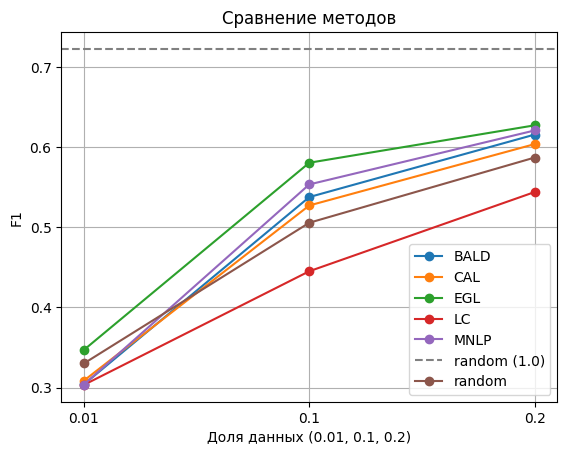

In [22]:
for method, values in results.items():
    x = [str(k) for k in values.keys() if k != 1.0]  # Преобразуем ключи в строки
    y = [v for k, v in values.items() if k != 1.0]

    if method == 'random':
        # Горизонтальная линия для random на уровне 1.0
        plt.axhline(y=values[1.0], color='gray', linestyle='--', label=f"{method} (1.0)")
        plt.plot(x, y, marker='o', label=method)  # Обычные точки random
    else:
        plt.plot(x, y, marker='o', label=method)

# Оформление графика
plt.title("Сравнение методов")
plt.xlabel("Доля данных (0.01, 0.1, 0.2)")
plt.ylabel("F1")
plt.legend()
plt.grid(True)
plt.show()